## CIS 4526 Sp24 EDA Review Exercise

### This Review Exercise will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [39]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [40]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset ##

In [41]:
crash = pd.read_csv("data/car_crashes2.csv")
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [42]:
crash.describe()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,52.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,15.817308,5.060235,5.574385,13.648154,14.043558,887.323654,134.865577
std,4.086070,2.033018,5.245624,4.497172,3.737999,176.559356,24.737451
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.775000,3.766500,3.897000,10.611000,11.434000,768.690000,114.732500
50%,15.650000,4.806000,4.629000,13.908000,14.141500,860.075000,136.590000
75%,18.450000,6.531000,5.640500,16.334500,16.719500,1006.347500,152.335000
max,23.900000,9.450000,40.642000,23.661000,21.280000,1301.520000,194.780000


## Question 1. Check if there are any null or NA

**Type in your code here**

In [43]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 2. Remove any rows that has null or NA

**Type in your code here**

In [44]:
crash.dropna(inplace=True)
crash.shape

(51, 10)

## Question 3. Check if there is any outliers in all numerical fields using both scatter and boxplot

**Type in your code here**

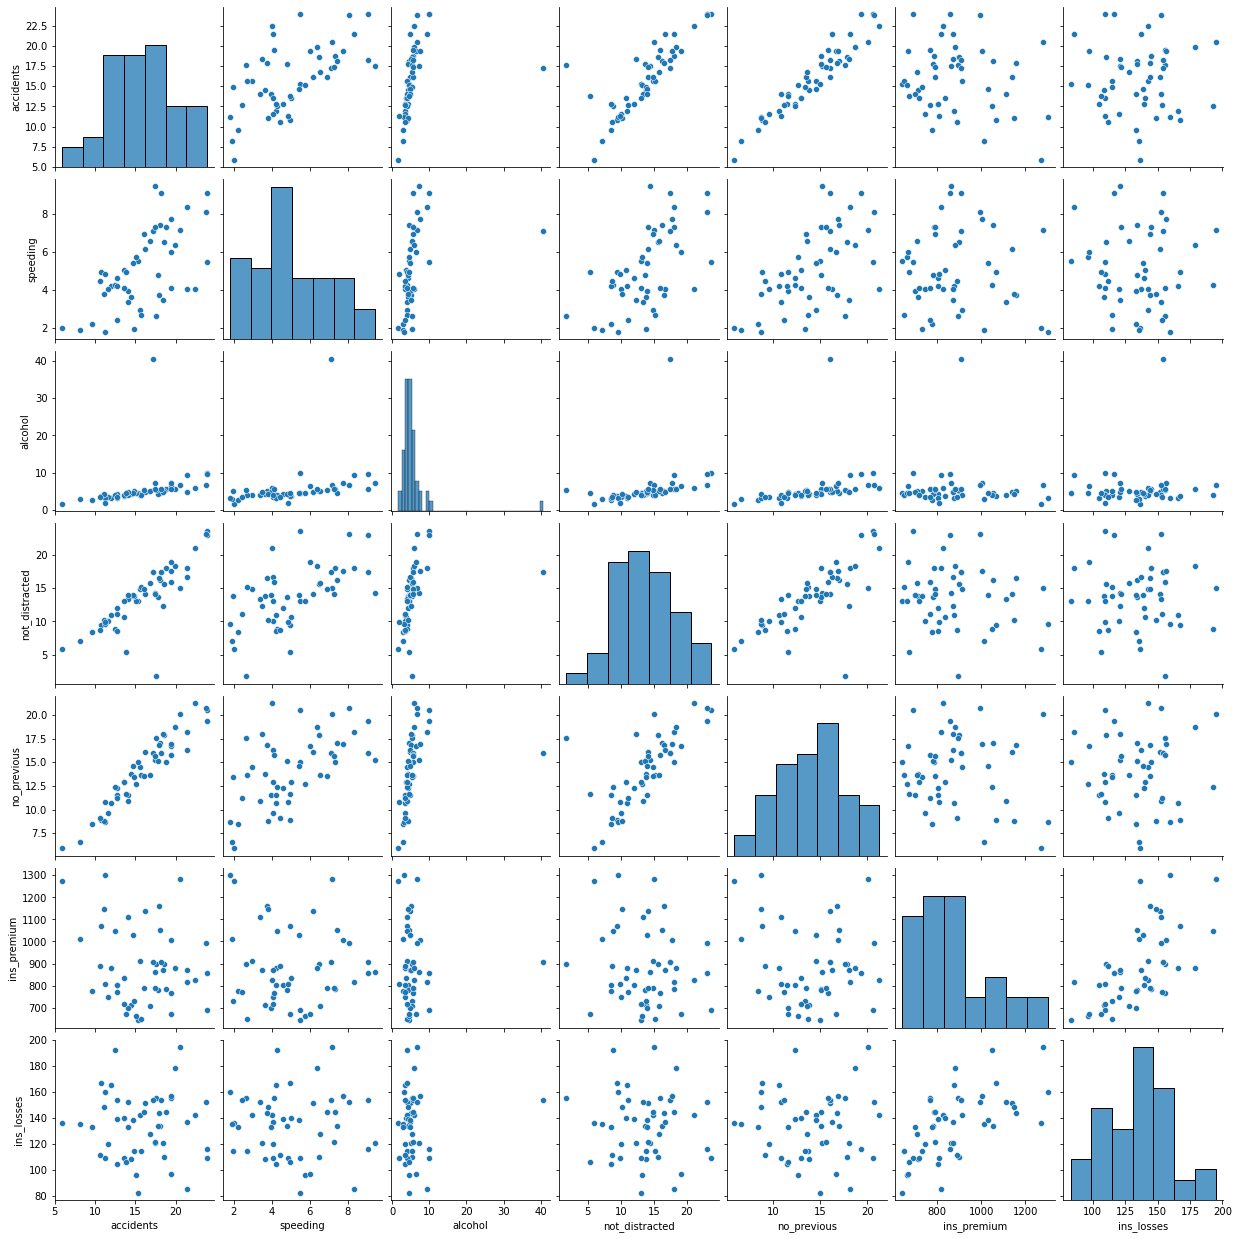

In [45]:
#pairplot first then drill later
sns.pairplot(data=crash)

<AxesSubplot:xlabel='alcohol', ylabel='speeding'>

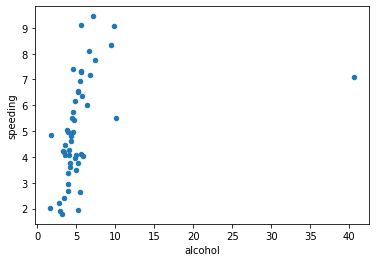

In [46]:
crash.plot.scatter(x="alcohol", y ="speeding")

count    51.000000
mean      5.060235
std       2.033018
min       1.792000
25%       3.766500
50%       4.806000
75%       6.531000
max       9.450000
Name: speeding, dtype: float64


<AxesSubplot:>

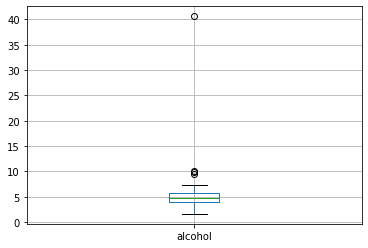

In [47]:
print(crash.speeding.describe())
# use boxplot from dataframe
crash.boxplot(column=['alcohol'])

<AxesSubplot:xlabel='alcohol'>

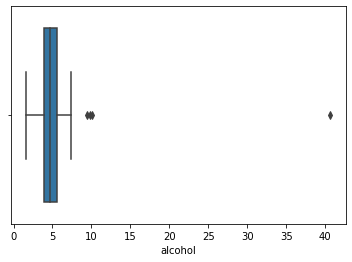

In [48]:
# or use seaborn
sns.boxplot(x=crash['alcohol'])

<AxesSubplot:xlabel='ins_premium'>

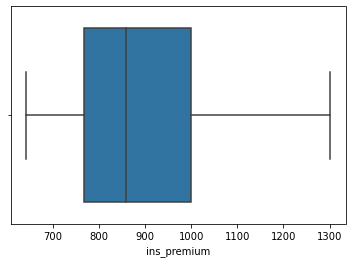

In [49]:
# or use seaborn
sns.boxplot(x=crash['ins_premium'])

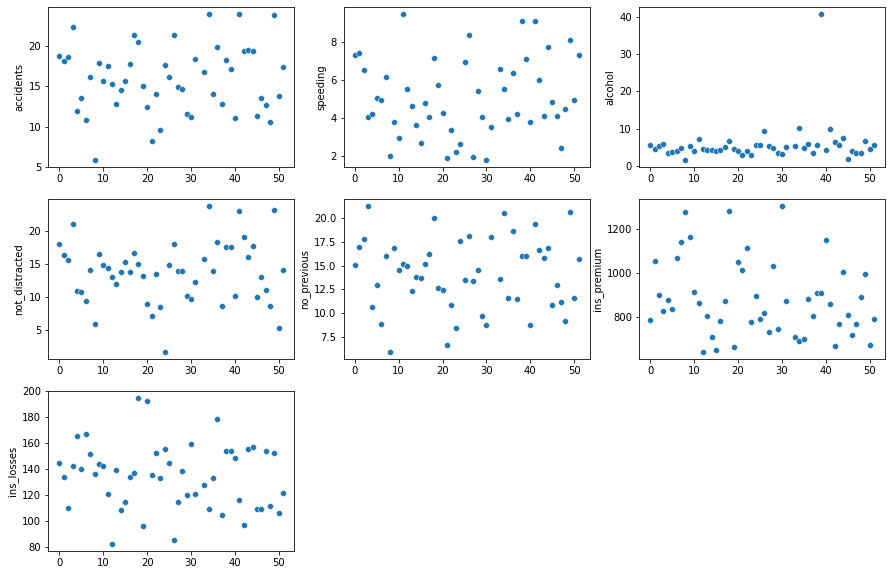

In [50]:
# Another possible answer
numerical_fields = crash.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_fields):
    plt.subplot(3,3, i+1)
    sns.scatterplot(x=crash.index, y=crash[col])
    plt.ylabel(col)

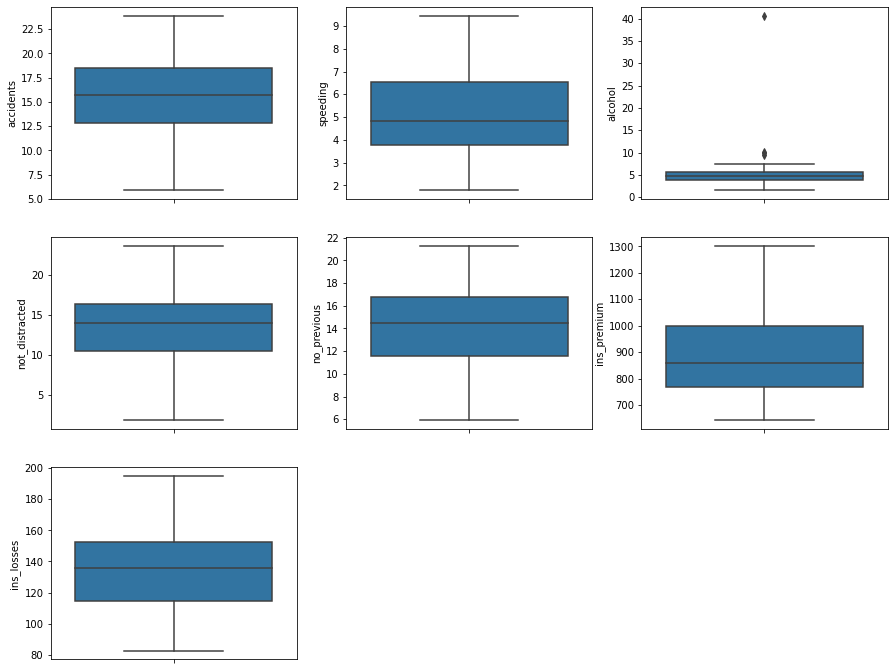

In [51]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_fields):
    plt.subplot(3,3, i+1)
    sns.boxplot(y=crash[col])
    plt.ylabel(col)

## Question 4. Display and Remove (the real) outliers

**Type in your code here**

In [52]:
crash[crash.alcohol >20]

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
39,17.2,7.1,40.642,17.472,16.016,905.99,153.86,PR,Territory,Territory


In [53]:
crash = crash[crash.alcohol < 20]
crash.shape

(50, 10)

In [54]:
crash[crash.alcohol > 1800]

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division


In [55]:
# remove the ins premium outliers
crash = crash[crash.ins_premium < 1800]

In [56]:
crash.shape

(50, 10)

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

**Type in your code here**

In [57]:
sql = "select count(*) as Count, avg(speeding) from crash"
df = ps.sqldf(sql)
df

,Count,avg(speeding)
0,50,5.01944


In [58]:
sql = "select count(*) as Count, avg(speeding) from crash where region = 'Northeast'"
df = ps.sqldf(sql)
df

,Count,avg(speeding)
0,8,4.42475


## Question 6. Calculate the average alcohol for each region using SQL

**Type in your code here**

In [59]:
print(ps.sqldf("select region, avg(alcohol) from crash group by region"))


      region  avg(alcohol)
0    Midwest      4.996917
1  Northeast      3.980500
2      South      5.414647
3       West      4.754077


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

**Type in your code here**

In [60]:
sql = "select division, count(*), avg(speeding), min(speeding), max(speeding) from crash group by division"
print(ps.sqldf(sql))

             division  count(*)  avg(speeding)  min(speeding)  max(speeding)
0  East North Central         5       4.106600          3.384          4.968
1  East South Central         4       4.533250          2.640          7.332
2     Middle Atlantic         2       5.446000          1.792          9.100
3            Mountain         8       5.812250          3.496          8.346
4         New England         6       4.084333          1.886          5.738
5             Pacific         5       5.949400          4.200          9.450
6      South Atlantic         9       5.030444          2.006          9.082
7  West North Central         7       4.293429          1.937          6.923
8  West South Central         4       6.333750          4.032          7.760


## Question 8. Answer Question 7 but use Pandas functions

**Type in your code here**

In [61]:
gpby = crash.groupby(['division'])['speeding']
print("Count")
print(gpby.count())
print("\nMean speeding by division")
print(gpby.mean())
print("\nMin speeding by division")
print(gpby.min())
print("\nMax speeding by division")
print(gpby.max())

Count
division
East North Central    5
East South Central    4
Middle Atlantic       2
Mountain              8
New England           6
Pacific               5
South Atlantic        9
West North Central    7
West South Central    4
Name: speeding, dtype: int64

Mean speeding by division
division
East North Central    4.106600
East South Central    4.533250
Middle Atlantic       5.446000
Mountain              5.812250
New England           4.084333
Pacific               5.949400
South Atlantic        5.030444
West North Central    4.293429
West South Central    6.333750
Name: speeding, dtype: float64

Min speeding by division
division
East North Central    3.384
East South Central    2.640
Middle Atlantic       1.792
Mountain              3.496
New England           1.886
Pacific               4.200
South Atlantic        2.006
West North Central    1.937
West South Central    4.032
Name: speeding, dtype: float64

Max speeding by division
division
East North Central    4.968
East South Ce

In [62]:
# OR use this
crash.groupby(['division'])['speeding'].describe()

,count,mean,std,min,25%,50%,75%,max
division,,,,,,,,
East North Central,5.0,4.106600,0.665705,3.384,3.62500,3.9480,4.60800,4.968
East South Central,4.0,4.533250,1.985597,2.640,3.70950,4.0805,4.90425,7.332
Middle Atlantic,2.0,5.446000,5.167536,1.792,3.61900,5.4460,7.27300,9.100
Mountain,8.0,5.812250,1.524017,3.496,4.98875,5.4735,6.70950,8.346
New England,6.0,4.084333,1.299621,1.886,3.84550,4.0700,4.74600,5.738
Pacific,5.0,5.949400,2.382195,4.200,4.22400,4.4520,7.42100,9.450
South Atlantic,9.0,5.030444,2.546183,2.006,2.96400,4.2500,6.55200,9.082
West North Central,7.0,4.293429,2.005279,1.937,2.43850,4.8060,5.75550,6.923
West South Central,4.0,6.333750,1.637184,4.032,5.78400,6.7715,7.32125,7.760


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region. Based on the results, describe any insights that you may have on the dataset ?

**Type in your code here**

In [63]:
# calculate the means 
crash.groupby(['region'])['accidents'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Midwest,12.0,15.558333,3.588988,9.6,14.025,14.7,16.525,23.9
Northeast,8.0,12.475000,3.077453,8.2,11.025,11.4,13.975,18.2
South,17.0,17.929412,4.537037,5.9,16.200,18.8,20.500,23.9
West,13.0,15.515385,3.325118,10.6,12.800,15.3,18.100,21.4


In [64]:
crash.groupby(['region'])['speeding'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Midwest,12.0,4.215583,1.537451,1.937,3.20525,4.278,5.10025,6.923
Northeast,8.0,4.424750,2.327773,1.792,3.30200,4.070,5.16050,9.100
South,17.0,5.220118,2.220711,2.006,3.75900,4.250,7.17500,9.082
West,13.0,5.865000,1.803138,3.496,4.45200,5.439,7.30800,9.450


In [65]:
crash.groupby(['region'])['alcohol'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Midwest,12.0,4.996917,1.824432,2.784,4.14075,4.453,5.27975,10.038
Northeast,8.0,3.980500,0.872950,2.870,3.39400,3.984,4.29600,5.642
South,17.0,5.414647,1.773576,1.593,4.86000,5.456,5.82400,9.799
West,13.0,4.754077,1.910356,1.808,3.49800,4.525,5.20800,9.416


In [66]:
gpby = crash.groupby(['region'])['accidents','speeding','alcohol']
gpby.std()

C:\Users\panga\AppData\Local\Temp\ipykernel_10852\2758448194.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gpby = crash.groupby(['region'])['accidents','speeding','alcohol']


,accidents,speeding,alcohol
region,,,
Midwest,3.588988,1.537451,1.824432
Northeast,3.077453,2.327773,0.872950
South,4.537037,2.220711,1.773576
West,3.325118,1.803138,1.910356


In [67]:
gpby.skew()

,accidents,speeding,alcohol
region,,,
Midwest,0.950845,0.121197,2.093467
Northeast,0.777587,1.051666,0.764250
South,-1.125839,0.172035,0.330988
West,0.064819,0.697441,1.159752


In [68]:
gpby.apply(pd.DataFrame.kurt)

,accidents,speeding,alcohol
region,,,
Midwest,2.067092,-0.737061,5.597372
Northeast,0.726713,1.763520,0.890501
South,1.860064,-1.327699,2.125568
West,-1.048692,-0.465455,2.219220


#### The cleanest way to call everything

In [69]:
# or
crash[['region', 'accidents', 'speeding', 'alcohol']].groupby('region').agg(['mean','std', 'skew', pd.DataFrame.kurt])

accidents                                speeding            \
                mean       std      skew      kurt      mean       std   
region                                                                   
Midwest    15.558333  3.588988  0.950845  2.067092  4.215583  1.537451   
Northeast  12.475000  3.077453  0.777587  0.726713  4.424750  2.327773   
South      17.929412  4.537037 -1.125839  1.860064  5.220118  2.220711   
West       15.515385  3.325118  0.064819 -1.048692  5.865000  1.803138   

                                alcohol                                
               skew      kurt      mean       std      skew      kurt  
region                                                                 
Midwest    0.121197 -0.737061  4.996917  1.824432  2.093467  5.597372  
Northeast  1.051666  1.763520  3.980500  0.872950  0.764250  0.890501  
South      0.172035 -1.327699  5.414647  1.773576  0.330988  2.125568  
West       0.697441 -0.465455  4.754077  1.910356  1.159752  2.219220

## For each attributes, accidents, speeding and alchool, comment on which region has highest average, std, skew positive or negative, and highest kurtosis such as

#### Accidents in the South is highest, its standard deivation is also highest, meaning there are a lot more accidents and its variability is also higer than all other regaion

#### The south has the highest accidents, speeding and alochol consumption. Their variability in each category is also fairly high

#### The Northeast has a high Kurtosis in speeding and the Midwest has the highest kurtosis in alcohol meaning speeding play a bigger role for accidents happened in the Northeast and drinking is a bigger factor for the accidents happened in the Midwest

## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

**Type in your answer here**

In [70]:
series = crash.groupby('region')['accidents']
series

array([[<AxesSubplot:title={'center':'Midwest'}>,
        <AxesSubplot:title={'center':'Northeast'}>],
       [<AxesSubplot:title={'center':'South'}>,
        <AxesSubplot:title={'center':'West'}>]], dtype=object)

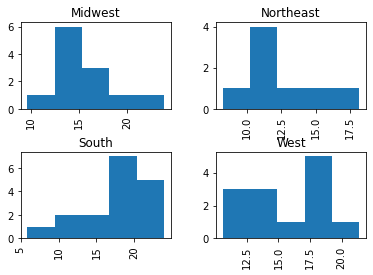

In [71]:
crash['accidents'].hist(by=crash['region'], bins=5)

Alcohol has the highest correlation and therefore will affect the accidents the most

### Now Load a different dataset (MPG dataset number 3)

In [72]:
mpg = pd.read_csv("data/mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


# Question 11: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

In [73]:
print(mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower, weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower, weight


## Type your code to fix the missing values by imputing value from the mean

In [74]:
print(mpg[mpg['mpg'].isnull()].shape)
print(mpg[mpg['horsepower'].isnull()].shape)
print(mpg[mpg['weight'].isnull()].shape)
mpg['mpg'] = mpg['mpg'].fillna( mpg['mpg'].mean())
mpg['horsepower'] = mpg['horsepower'].fillna( mpg['horsepower'].mean())
mpg['weight'] = mpg['weight'].fillna( mpg['weight'].mean())
print(mpg.isnull().any())
print(mpg.shape)

(1, 9)
(6, 9)
(1, 9)
mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool
(405, 9)


In [75]:
mpg.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool